### Student Information
Name: 張之綺

Student ID: 112033635

GitHub ID: chihchi0717

Kaggle name: Chang Chih-Chi

Kaggle private scoreboard snapshot:

[Snapshot](./img/pic0.jpg)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [25]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [26]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [27]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [28]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [29]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [30]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import numpy as np
count_vect = CountVectorizer()
#Count the frequency of each word.
train_counts = count_vect.fit_transform(train_df.text)
test_counts = count_vect.fit_transform(test_df.text)
#print(count_vect.get_feature_names_out())
#print(count_vect.vocabulary_)
print(train_counts) 

#Frequency for Top 30 words in train dataset
# Calculate term frequencies
train_term_frequencies = np.asarray(train_counts.sum(axis=0))[0]
#print('term_frequencies',train_term_frequencies)
train_term_names = count_vect.get_feature_names_out()
#print('term_names',train_term_names)
# Create a list of (term, frequency) tuples and sort by frequency in descending order
train_term_freq_pairs = sorted(zip(train_term_names, train_term_frequencies), key=lambda x: x[1], reverse=True)
# Extract the sorted terms and frequencies
train_sorted_terms = [term for term, frequency in train_term_freq_pairs]
train_sorted_frequencies = [frequency for term, frequency in train_term_freq_pairs]
n = 30
# Create a DataFrame for the top N terms
data = {'Term': train_sorted_terms[:n], 'Frequency': train_sorted_frequencies[:n]}
df = pd.DataFrame(data)
# Create a bar plot using Plotly Express
train_fig = px.bar(df, x='Term', y='Frequency', title=f'{n} Term Frequencies in train dataset',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})
# Customize the appearance of the plot
train_fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
train_fig.show()


  (0, 7791)	1
  (0, 9091)	1
  (0, 1448)	1
  (0, 2463)	1
  (0, 9528)	1
  (0, 6371)	1
  (0, 8930)	2
  (0, 7233)	1
  (0, 988)	1
  (0, 1075)	1
  (0, 5026)	1
  (0, 3864)	1
  (0, 1044)	1
  (0, 5957)	1
  (0, 7519)	1
  (0, 1315)	1
  (0, 7597)	1
  (0, 5963)	1
  (1, 6371)	1
  (1, 8930)	3
  (1, 4213)	1
  (1, 6191)	1
  (1, 5292)	1
  (1, 2789)	1
  (1, 9872)	1
  :	:
  (3611, 8078)	1
  (3611, 9693)	1
  (3611, 176)	1
  (3611, 8539)	1
  (3611, 1125)	1
  (3611, 1420)	1
  (3611, 5054)	1
  (3612, 8930)	1
  (3612, 9872)	2
  (3612, 537)	3
  (3612, 8264)	1
  (3612, 3995)	1
  (3612, 4009)	1
  (3612, 3610)	1
  (3612, 8960)	1
  (3612, 3742)	2
  (3612, 2426)	1
  (3612, 8614)	1
  (3612, 5511)	1
  (3612, 5624)	1
  (3612, 1055)	1
  (3612, 7036)	1
  (3612, 6660)	1
  (3612, 3134)	1
  (3612, 3422)	1


In [31]:
#Frequency for Top 30 words in test dataset
test_term_frequencies = np.asarray(test_counts.sum(axis=0))[0]
#print('term_frequencies',test_term_frequencies)
test_term_names = count_vect.get_feature_names_out()
#print('term_names',test_term_names)
# Create a list of (term, frequency) tuples and sort by frequency in descending order
test_term_freq_pairs = sorted(zip(test_term_names, test_term_frequencies), key=lambda x: x[1], reverse=True)
# Extract the sorted terms and frequencies
test_sorted_terms = [term for term, frequency in test_term_freq_pairs]
test_sorted_frequencies = [frequency for term, frequency in test_term_freq_pairs]
n = 30
# Create a DataFrame for the top N terms
data = {'Term': test_sorted_terms[:n], 'Frequency': test_sorted_frequencies[:n]}
df = pd.DataFrame(data)
# Create a bar plot using Plotly Express
test_fig = px.bar(df, x='Term', y='Frequency', title=f'{n} Term Frequencies in test dataset',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})
# Customize the appearance of the plot
test_fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
test_fig.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [33]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [34]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\cchih\.conda\envs\dmlab2\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [35]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF vectorizer with 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Learn the vocabulary dictionary and transform documents to TF-IDF matrix
train_data_tfidf_features = tfidf_vectorizer.fit_transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

# Show the feature names for features [100:110]
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print("Feature names for features [100:110]:", feature_names_tfidf[100:110])

Feature names for features [100:110]: ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [36]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [37]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'joy', 'joy', 'fear', 'sadness', 'sadness',
       'sadness', 'sadness', 'joy'], dtype=object)

In [38]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [39]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [40]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

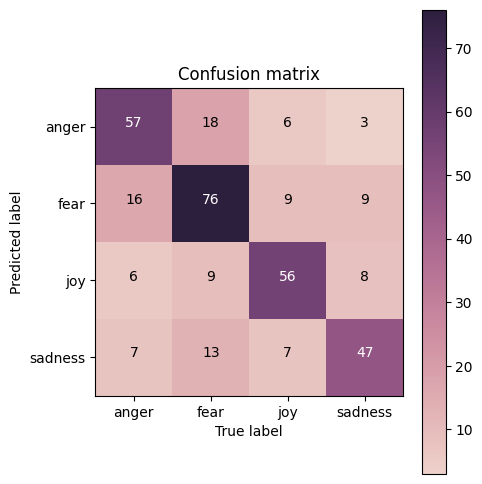

In [41]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Answer here
The actual count of 'anger' is 57+16+6+7 = 86. The model correctly predicted 'anger' 57 times. It was misclassified as 'fear' 16 times, as 'joy' 6 times, and as 'sadness' 7 times.

The actual count of 'fear' is 18+76+9+13 = 116. The model correctly predicted 'fear' 76 times. It was misclassified as 'anger' 18 times, as 'joy' 9 times, and as 'sadness' 13 times.

The actual count of 'joy' is 6+9+56+7 = 78. The model correctly predicted 'joy' 78 times. It was misclassified as 'anger' 6 times, as 'fear' 9 times, and as 'sadness' 7 times.

The actual count of 'sadness' is 3+9+8+47 = 67. The model correctly predicted 'sadness' 67 times. It was misclassified as 'anger' 3 times, as 'fear' 9 times, and as 'joy' 8 times.

It can be observed that the actual 'anger' samples misclassified as 'fear,' as well as the samples that are correctly or mistakenly classified as 'anger' or 'sadness,' have relatively higher counts. Therefore, 'anger' and 'fear' appear to be more challenging categories to classify.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [44]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize, token_pattern=None) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [45]:
MNB_model = MultinomialNB()

## Model training
MNB_model = MNB_model.fit(X_train, y_train)

## Model predict
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

##Predict result
y_test_pred[:10]

array(['joy', 'anger', 'anger', 'joy', 'fear', 'anger', 'sadness',
       'sadness', 'anger', 'fear'], dtype='<U7')

---
### Results Evaluation

In [46]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [47]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [49]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

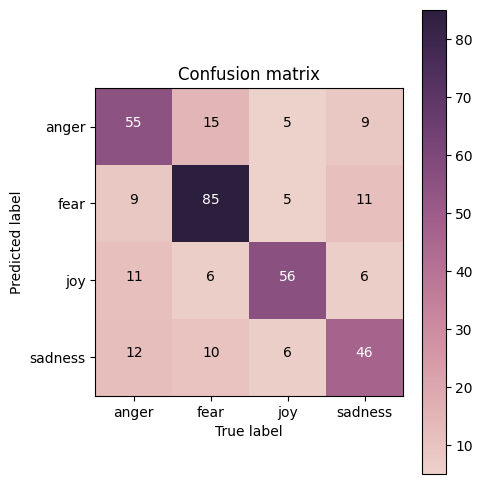

In [50]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here

Decision Tree Model:

The confusion matrix for the Decision Tree model shows a relatively balanced distribution of correct and incorrect predictions across the four emotion categories ('anger', 'fear', 'joy', 'sadness').
Notably, the model seems to struggle with accurately classifying instances of 'anger' and 'fear', as evidenced by the higher numbers in the off-diagonal elements (misclassifications).

Decision Trees are known for their ability to capture complex relationships in the data, potentially leading to overfitting. In this case, the model might be fitting the training data too closely, resulting in some difficulty in generalizing to new, unseen instances.
Decision Trees are sensitive to noise and outliers, which might explain the misclassifications observed in the confusion matrix.

Naive Bayes Model:

The confusion matrix for the Naive Bayes model indicates a different pattern of performance compared to the Decision Tree model.
The Naive Bayes model also encounters challenges in correctly classifying instances, particularly for 'anger' and 'fear'. It has a noticeable number of instances misclassified as 'joy' and 'sadness'.

Naive Bayes relies on the assumption of independence between features, which might not hold in real-world scenarios. If the features are not truly independent, it can impact the model's performance.
Naive Bayes is generally considered a simpler model with fewer parameters. While it might be less prone to overfitting, it might struggle to capture complex relationships in the data.


### 6.1 Prepare data (X, y)


In [51]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

In [52]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 333       anger
2742        joy
2215        joy
3608    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [53]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](../pics/pic2.png)

In [54]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [58]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
  1/113 [..............................] - ETA: 0s - loss: 1.2115 - accuracy: 0.5625

113/113 [==============================] - 0s 1ms/step - loss: 0.9849 - accuracy: 0.6515 - val_loss: 0.8976 - val_accuracy: 0.6772
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.8002 - val_loss: 0.7525 - val_accuracy: 0.6916
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8392 - val_loss: 0.8087 - val_accuracy: 0.7061
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8696 - val_loss: 0.8203 - val_accuracy: 0.6945
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.9089 - val_loss: 0.8807 - val_accuracy: 0.6888
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9261 - val_loss: 0.9257 - val_accuracy: 0.6888
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9361 - val_loss: 1.0117 - val_accuracy: 0.6859
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [59]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[6.2289832e-06, 8.9756691e-09, 9.9999344e-01, 3.0758150e-07],
       [6.3791043e-01, 3.5702574e-01, 2.8288804e-03, 2.2349996e-03],
       [9.5476285e-03, 7.0843627e-05, 9.8798686e-01, 2.3947253e-03],
       [2.3426997e-02, 3.0543950e-05, 9.7646642e-01, 7.6118522e-05],
       [3.1026651e-04, 9.6614563e-01, 3.3036631e-03, 3.0240413e-02]],
      dtype=float32)

In [60]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'joy', 'joy', 'fear'], dtype=object)

In [61]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [63]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.651536,0.984855,0.677233,0.897604
1,1,0.800166,0.583624,0.691643,0.752459
2,2,0.839192,0.429626,0.706052,0.808730
3,3,0.869637,0.343225,0.694524,0.820318
4,4,0.908940,0.274950,0.688761,0.880677
5,5,0.926100,0.227946,0.688761,0.925728
6,6,0.936064,0.190593,0.685879,1.011696
7,7,0.948796,0.164795,0.685879,1.066392
8,8,0.956546,0.140302,0.674352,1.160785
9,9,0.965679,0.122994,0.685879,1.212133


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

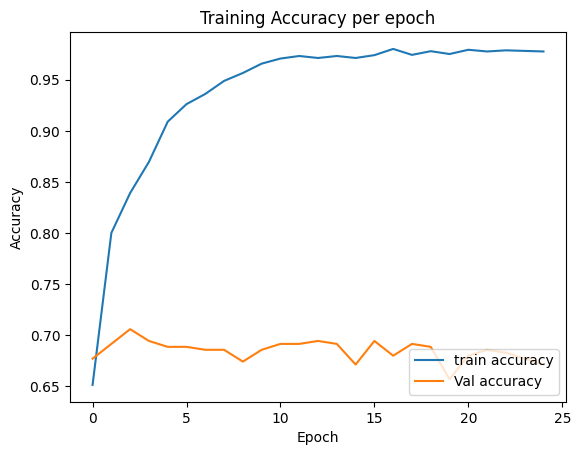

In [65]:
lines = training_log.plot.line(x='epoch', y=['accuracy', 'val_accuracy'])
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

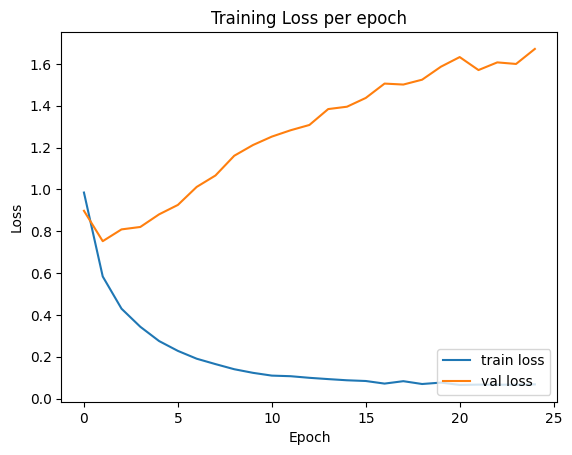

In [64]:
# Answer here
lines = training_log.plot.line(x='epoch', y=['loss', 'val_loss'])
plt.title('Training Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'val loss'], loc='lower right')
plt.show()

### Answer here
Looking at the two charts, we can see that after around the 3rd epoch, the validation accuracy starts to go down slowly, and the validation loss starts to go up. This is a sign that the model is getting too specific to the training data. So, if we need to choose a point for implementation, I'd go with the 3rd epoch since that seems to give the best performance in both loss and accuracy.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

### Answer here
Create an embedding matrix by assigning an index to each word in the word vectors. Tokenize the input data to convert sequences of words into sequences of tokens. Next, assign an index to each token based on the embedding matrix. If a token cannot be matched, set its index to 0, resulting in an embedding matrix of all zeros for that token. This process transforms each sequence of words (sentence) into a 2D array where the word vectors for each token are stored.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [72]:
# Answer here
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('finished loading')

finished loading


In [73]:
word_list = ['angry','happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)] 
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('\ntarget words: ')
print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


target words: 
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', '

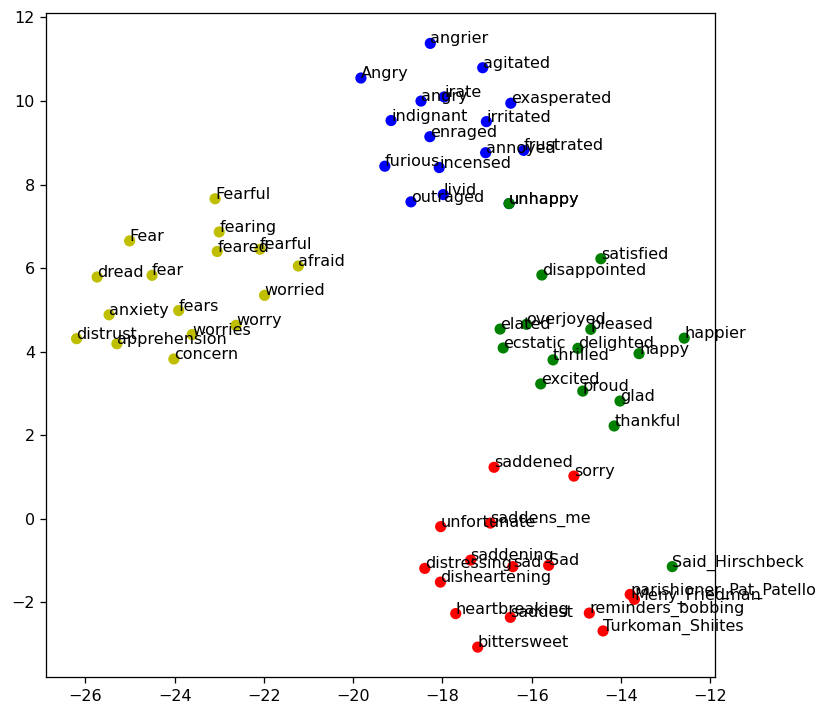

In [74]:
from sklearn.manifold import TSNE
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = model.index_to_key
# all_word = model.index2word
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()